In [1]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a = np.array([ 1, 2, 3, 4])
a[0:2] = 1
a

array([1, 1, 3, 4])

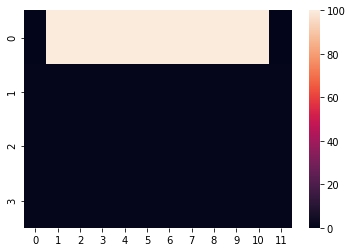

In [3]:
state_space_rewards = np.ones((4,12))*-1

start_state = [0,0]
end_state = [0, 3]
state_space_rewards[0, 1:11] = -100
state_space_rewards[0,0] = 0
state_space_rewards[0, -1] = 0
sns.heatmap(state_space_rewards*-1)
START_STATE = [0,0]
END_STATE = [0, 11]


plt.show()


In [11]:
print(state_space_rewards)

[[   0. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.    0.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]]


In [5]:
actions_list = np.array([[0,1] ,[0,-1] ,[1,0], [-1,0]])
actions_keys = ['up', 'down', 'left', 'right']
action_indices = [0, 1, 2, 3]
def action_to_coords(action, cur_coords):
    
    return cur_coords + action_list[action]


Q-Learning for policy

In [27]:
alpha = 0.1
# A_s = np.zeros_like(state_space_rewards)


In [12]:
num_episodes = 500
epsilon =  0.1
gamma = 1.0
alpha = 0.1

In [34]:
print(list(range(1,11)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [60]:
 def run_q(num_episodes = 500):
    Q_sa = np.zeros((*state_space_rewards.shape, 4))
    Q_sa[START_STATE[0], START_STATE[1],:] = 0
    Q_sa[END_STATE[0], END_STATE[1],:] = 0
    q_episode_rewards = []
    for i in range(num_episodes):
        cur_state = START_STATE
        done = False
        rewards = []
        while not done:
            next_state = [0 , 0]
            if np.random.rand() <  0.1:
                action = np.random.choice(action_indices)
            else:
                action = np.argmax(Q_sa[cur_state[0], cur_state[1]])
    #         print(action)
            action_value = actions_list[action]
    #         print('curstate', cur_state)
    #         print('cur_val', action_value)
            next_state[0] = cur_state[0] + action_value[0]
            next_state[1] = cur_state[1] + action_value[1] 

            if next_state == END_STATE:
                done = True
                reward = -1

            elif next_state[0] == 0 and (next_state[1] in list(range(1,11))):
                done = False
                reward = -100
                next_state = START_STATE
                rewards.append(reward)
            elif next_state[0] < 0 or next_state[0] > 3 or next_state[1] < 0 or next_state[1] > 11:
                next_state[0] = cur_state[0]
                next_state[1] = cur_state[1]

                reward = -1
                done = False
            else:
                done  = False 
                reward = -1
            Q_sa[cur_state[0], cur_state[1], action] = Q_sa[cur_state[0], cur_state[1], action] +\
                                alpha*(reward + gamma*max(Q_sa[next_state[0], next_state[1]]) -\
                                       Q_sa[cur_state[0], cur_state[1], action])

            cur_state[0] = next_state[0]
            cur_state[1] = next_state[1]
            rewards.append(reward)
#         if np.sum(rewards) >= -100:
        q_episode_rewards.append(np.sum(rewards))
#         else:
#             q_episode_rewards.append(-100)
    return q_episode_rewards

SARSA

In [14]:
num_episodes = 500
epsilon =  0.1
gamma = 1.0
alpha = 0.1

In [64]:
print(START_STATE)

[0, 12]


In [80]:
print(Q_sa.shape)

(4, 12, 4)


In [61]:
def run_sarsa(num_episodes = 500):
    Q_sa = np.zeros((*state_space_rewards.shape, 4))

    Q_sa[START_STATE[0], START_STATE[1],:] = 0
    Q_sa[END_STATE[0], END_STATE[1],:] = 0
    sarsa_episode_rewards = []
    for i in range(num_episodes):
        cur_state = START_STATE
        done = False
        rewards = []
        action = np.argmax(Q_sa[cur_state[0], cur_state[1]])
        iter = 0
        while not done:

            if np.random.rand() <  0.1:
    #             print('random action', iter)
                action = np.random.choice(action_indices)

            action_value = actions_list[action]
            next_state[0] = cur_state[0] + action_value[0]
            next_state[1] = cur_state[1] + action_value[1] 
    #         print('next_state', next_state)
            if next_state == END_STATE:
                done = True
                reward = -1
            elif next_state[0] == 0 and next_state[1] in list(range(1,11)):
                done = False
                reward = -100
                next_state[0] = START_STATE[0]
                next_state[1] = START_STATE[1]
    #             print(next_state)

            elif next_state[0] < 0 or next_state[0] > 3 or next_state[1] < 0 or next_state[1] > 11:
                done = False
                next_state[0] = cur_state[0]
                next_state[1] = cur_state[1]
                reward = -1

            else:
                done  = False 
                reward = -1
            if np.random.rand() < 0.1:
                next_action = np.random.choice(action_indices)
            else:
                next_action = np.argmax(Q_sa[next_state[0], next_state[1]])
            Q_sa[cur_state[0], cur_state[1], action] = Q_sa[cur_state[0], cur_state[1], action] +\
                     alpha*(reward + gamma*(Q_sa[next_state[0], next_state[1], next_action]) \
                                       - Q_sa[cur_state[0], cur_state[1], action])

            cur_state[0] = next_state[0]
            cur_state[1] = next_state[1]

            action = next_action
            rewards.append(reward)
            iter += 1
#         if np.sum(rewards) >= -100:
        sarsa_episode_rewards.append(np.sum(rewards))
#         else:
#             sarsa_episode_rewards.append(-100)
    return sarsa_episode_rewards

In [62]:
q_learning = []
sarsa = []
for i in range(100):
    if i % 10 == 0:
        print(i)
    q_episode_rewards = run_q()
    sarsa_episode_rewards = run_sarsa()
    q_learning.append(q_episode_rewards)
    sarsa.append(sarsa_episode_rewards)
# fig = plt.figure(figsize=(10,10))
# plt.plot(q_episode_rewards)
# plt.plot(sarsa_episode_rewards)
# plt.show()

0
10
20
30
40
50
60
70
80
90


In [55]:
print(np.array(q_learning).shape)
# print(np.array())


(100, 500)


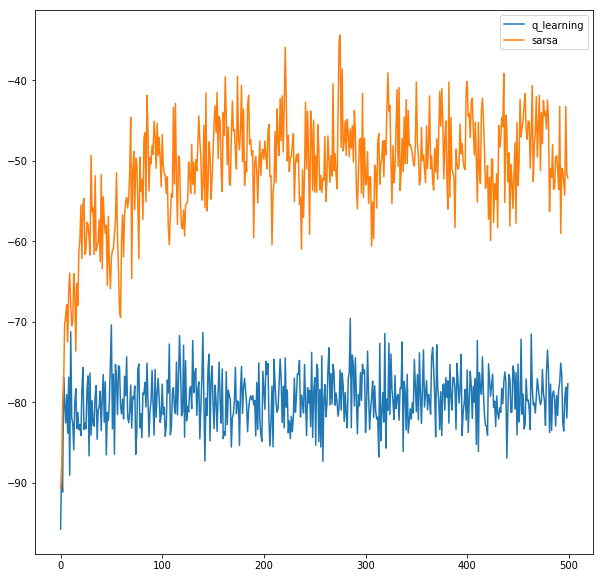

In [58]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.average(q_learning, axis=0), label='q_learning')
plt.plot(np.average(sarsa, axis=0), label='sarsa')
plt.legend()
plt.show()